In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime, timedelta
import swifter

In [28]:
df =pd.read_csv('data/aq_46-Kansanga.csv')
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2020-08-06T06:57:34Z,418159,43.58,53.13,34.27,39.10,0.298781,32.614975,4.18,"0.298781,32.614975,1223.50,0.06,6.00,142.00,0...."
1,2020-08-06T06:59:03Z,418160,45.10,56.47,34.98,39.55,0.298722,32.614960,4.16,"0.298722,32.614960,1206.90,0.32,5.00,182.00,0...."
2,2020-08-06T07:00:25Z,418161,45.23,54.80,35.83,41.28,0.298755,32.614826,4.17,"0.298755,32.614826,1220.40,0.32,5.00,170.00,0...."
3,2020-08-06T07:01:46Z,418162,42.18,50.70,33.60,37.75,0.298657,32.614925,4.18,"0.298657,32.614925,1201.40,0.16,6.00,143.00,0...."
4,2020-08-06T07:03:08Z,418163,42.97,54.77,34.48,39.82,0.298698,32.614983,4.17,"0.298698,32.614983,1208.20,0.19,4.00,274.00,0...."


In [29]:
df= preprocessing(df, 'pm2_5')
df.head()

,created_at,pm2_5
0,2020-08-13 23:59:36+00:00,39.42
1,2020-08-13 23:58:15+00:00,38.42
2,2020-08-13 23:57:01+00:00,37.25
3,2020-08-13 23:55:41+00:00,39.62
4,2020-08-13 23:54:11+00:00,38.65


In [30]:
df['urban_background'] = df['created_at'].swifter.apply(get_minimum)
df.head()

,created_at,pm2_5,urban_background
0,2020-08-13 23:59:36+00:00,39.42,36.58
1,2020-08-13 23:58:15+00:00,38.42,36.58
2,2020-08-13 23:57:01+00:00,37.25,36.58
3,2020-08-13 23:55:41+00:00,39.62,36.58
4,2020-08-13 23:54:11+00:00,38.65,36.58


In [31]:
df['local_sources'] = df['pm2_5']-df['urban_background']
df.head()

,created_at,pm2_5,urban_background,local_sources
0,2020-08-13 23:59:36+00:00,39.42,36.58,2.84
1,2020-08-13 23:58:15+00:00,38.42,36.58,1.84
2,2020-08-13 23:57:01+00:00,37.25,36.58,0.67
3,2020-08-13 23:55:41+00:00,39.62,36.58,3.04
4,2020-08-13 23:54:11+00:00,38.65,36.58,2.07


In [32]:
df.to_csv(r'background vs local/kansanga.csv', index=False)

In [33]:
df.head()

,created_at,pm2_5,urban_background,local_sources
0,2020-08-13 23:59:36+00:00,39.42,36.58,2.84
1,2020-08-13 23:58:15+00:00,38.42,36.58,1.84
2,2020-08-13 23:57:01+00:00,37.25,36.58,0.67
3,2020-08-13 23:55:41+00:00,39.62,36.58,3.04
4,2020-08-13 23:54:11+00:00,38.65,36.58,2.07


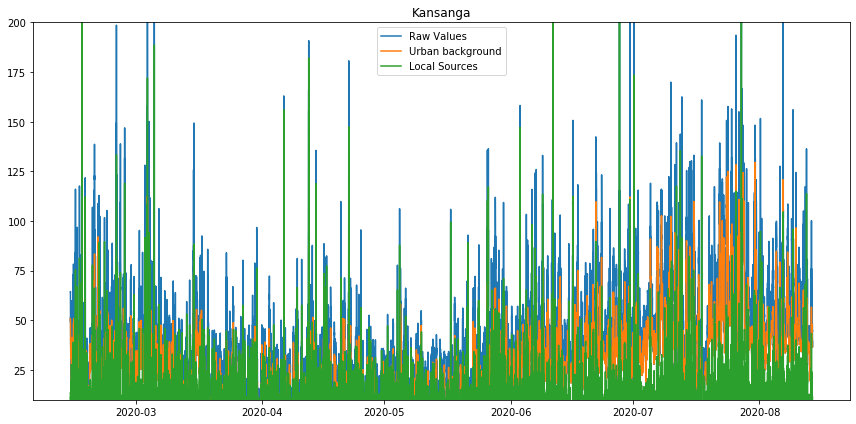

In [38]:
x_values = df['created_at'].values
y1_values = df['pm2_5'].values
y2_values = df['urban_background'].values
y3_values = df['local_sources'].values
    
x_axis_label = 'Time'
y_axis_label = 'PM 2.5 Concentration'
y1_label =  'Raw Values'
y2_label =  'Urban background'
y3_label =  'Local Sources'

plt.figure(figsize=(12,6))
plt.title('Kansanga')
plt.ylim(10,200)
plt.plot(x_values, y1_values, label=y1_label)
plt.plot(x_values, y2_values, label=y2_label)
plt.plot(x_values, y3_values, label=y3_label)
plt.legend(loc='best')
plt.tight_layout() 
plt.savefig('background vs local/kansanga.png') 
#plt.savefig('background vs local/plots/kansanga.png') 
#fig1 = plt.gcf()
plt.show()
#plt.draw()


In [39]:
#array with channel names, locations, ids and api keys
channel_array = [{'name':'aq_66', 'location':'Nakasero II(2)', 'id':912221, 'api_key':'WNIR3I3JT61XARH2', 'lat':0.32232, 'long':32.5757},
                {'name':'aq_46', 'location':'Kansanga','id':782719, "api_key": "QTNAHITKHEJ4C9I5", 'lat':0.29875, 'long':32.615}, 
                {'name':'aq_58', 'location':'Nansana East','id':870142, "api_key": "RKD5ITYJH4PPEOYX", 'lat':0.3759, 'long':32.528}, 
                {'name':'aq_39', 'location':'Lubaga','id':737276, "api_key": "VHE2PZCJLMYHB7ZI", 'lat':0.295314, 'long':32.553682},
                {'name':'aq_63', 'location':'Nansana West','id':870147, "api_key": "QKS54M3HPNBOY004", 'lat':0.363, 'long':32.529},
                {'name':'aq_49', 'location':'Lukuli(2)', 'id':782722, 'api_key':'OGG3UX99KTA41C1K', 'lat':0.2836, 'long':32.6},
                {'name':'aq_29', 'location':'Bugolobi', 'id':718028, "api_key": "HNTV5QEJTD8RTG2H", 'lat':0.3075, 'long':32.6206},
                {'name':'aq_59', 'location':'Kyaliwajjala','id':870143, "api_key": "7OA7SZN6FI9GJDQ5", 'lat':0.381576, 'long':32.647109},
                {'name':'aq_32', 'location':'Seguku', 'id':730014, 'api_key':'8A9OOESUKHXIE80Z', 'lat':0.235668, 'long':32.55764},
                {'name':'aq_30', 'location':'Kiwafu', 'id':718029, "api_key":"TRF8VHH9DWUKBT59", 'lat':0.059604, 'long':32.46032},
                {'name':'aq_61', 'location':'Kiwatule','id':870145, "api_key": "800XZ9WZSCA6PKQY", 'lat':0.373078, 'long':32.628226},
                {'name':'aq_26', 'location':'Civic Centre','id':689761, "api_key": "YEGZIVUS16X2R4BO", 'lat':0.314, 'long':32.59},             
                {'name':'aq_43', 'location':'Makindye I','id':755612, "api_key": "AZ3Q42XK8FOUF8P7", 'lat':0.289, 'long':32.589}                
               ]

In [40]:
def preprocessing(df, name):
    '''
    preprocessing data in dataframe
    '''
    df['created_at'] = pd.to_datetime(df['created_at'])
    df = df.sort_values(by='created_at',ascending=False)
    df.reset_index(inplace=True, drop=True)
    df['field1'].fillna(df['field3'])
    df.drop(['entry_id','field2','field3', 'field4', 'field5', 'field6', 'field7', 'field8'], axis=1, inplace=True)
    df['field1'] = pd.to_numeric(df['field1'],errors='coerce')
    df = df.rename(columns={'field1':name})
    df.dropna(inplace=True)
    return df

In [41]:
def get_minimum(time):
    '''
    Finds the minimum PM2.5 measurement within an hour for each measurement
    '''
    start = time-timedelta(minutes=30)
    stop = time+timedelta(minutes=30)
    mask = (df['created_at']>=start)&(df['created_at']<=stop)
    mini_df = df.loc[mask]
    return mini_df['pm2_5'].min()

In [42]:
def plotting(df, title):
    x_values = df['created_at'].values
    y1_values = df['pm2_5'].values
    y2_values = df['urban_background'].values
    y3_values = df['local_sources'].values
    
    x_axis_label = 'Time'
    y_axis_label = 'PM 2.5 Concentration'
    y1_label =  'Raw Values'
    y2_label =  'Urban background'
    y3_label =  'Local Sources'

    plt.figure(figsize=(12,6))
    plt.title(title)
    plt.ylim(10,200)
    plt.plot(x_values, y1_values, label=y1_label)
    plt.plot(x_values, y2_values, label=y2_label)
    plt.plot(x_values, y3_values, label=y3_label)
    plt.legend(loc='best')
    plt.tight_layout() 
    plt.savefig('background vs local/plots/'+title+'.png') 
    plt.show()    

C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


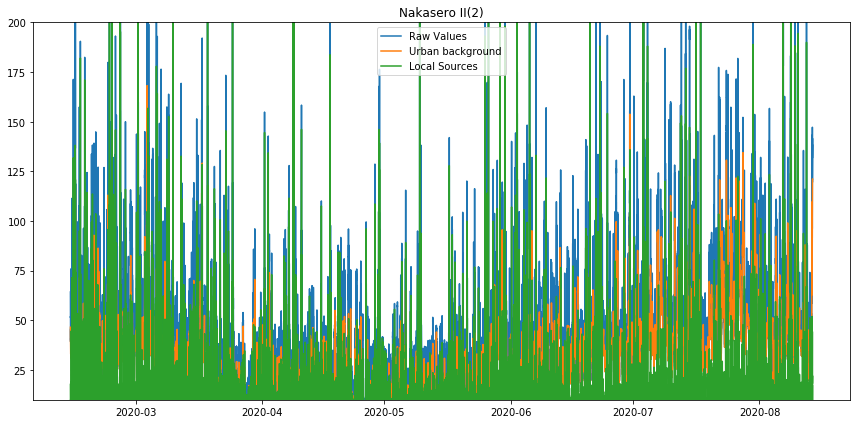

Location  0 done!


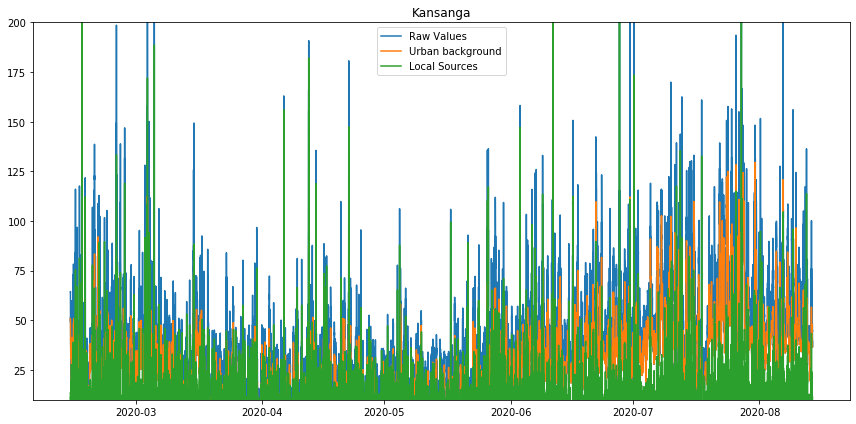

Location  1 done!


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


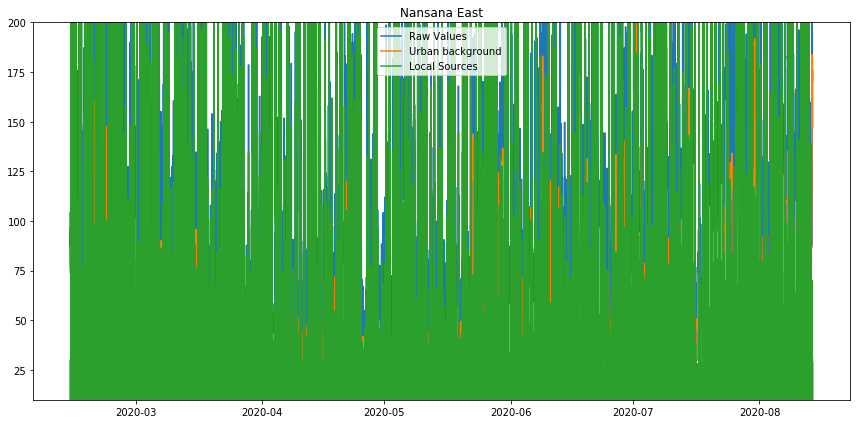

Location  2 done!


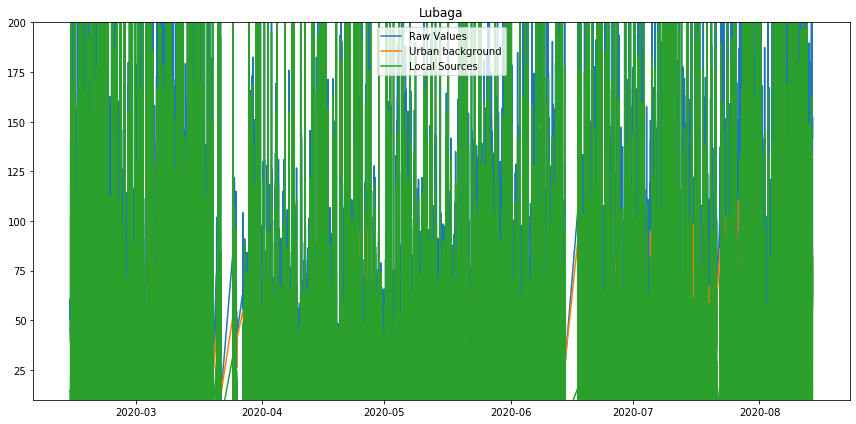

Location  3 done!


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


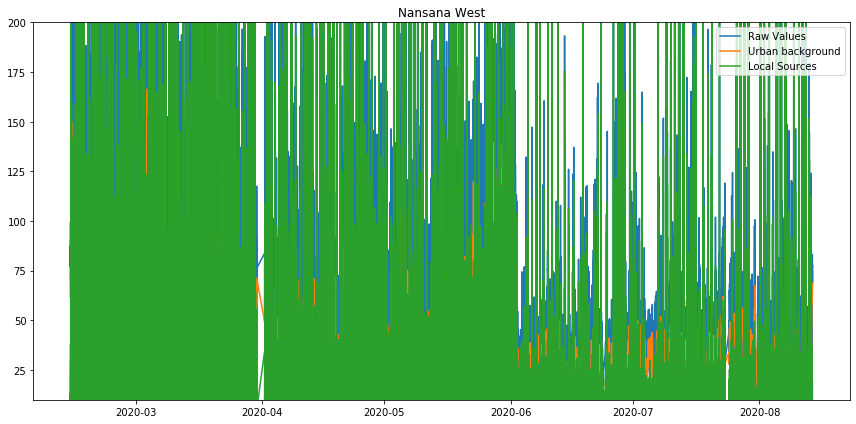

Location  4 done!


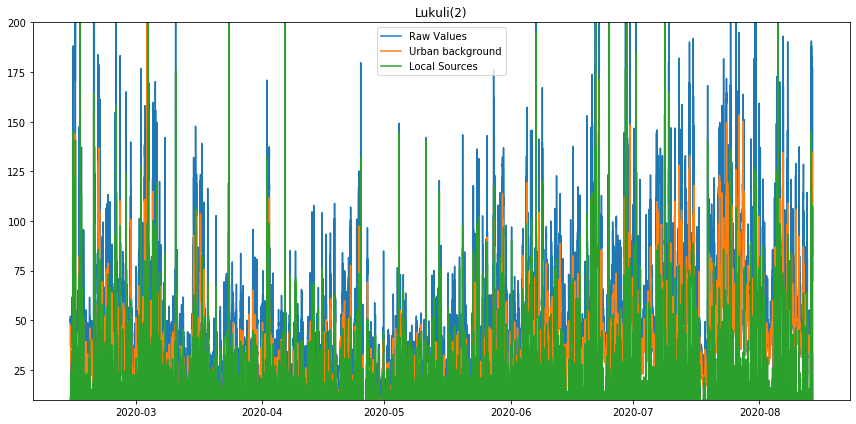

Location  5 done!


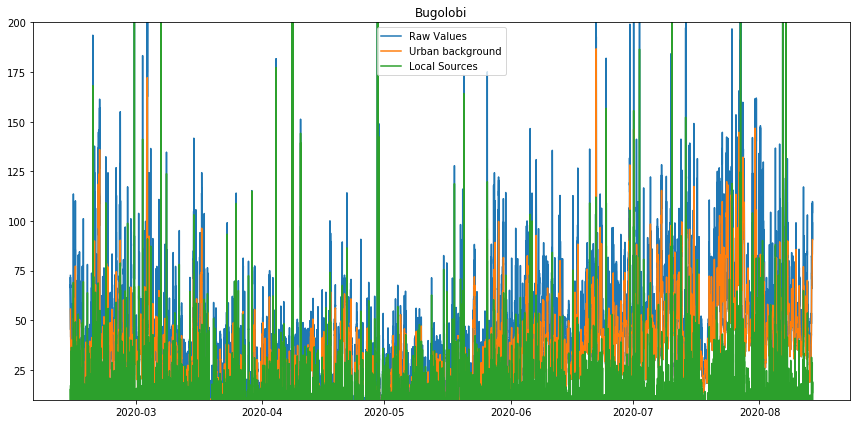

Location  6 done!


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


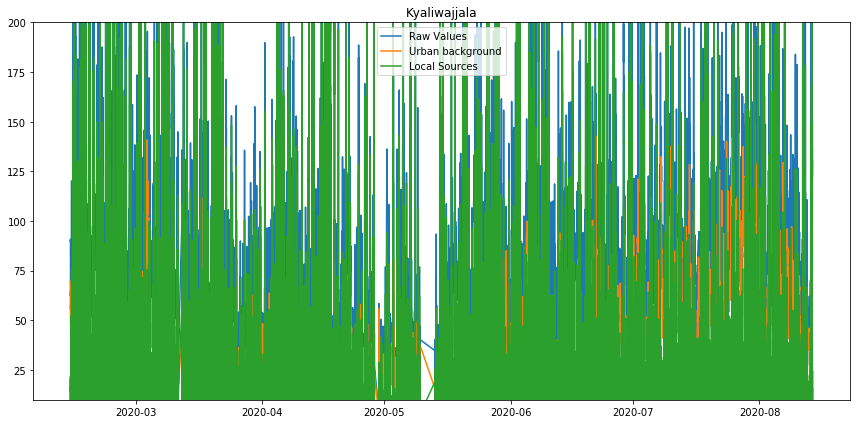

Location  7 done!


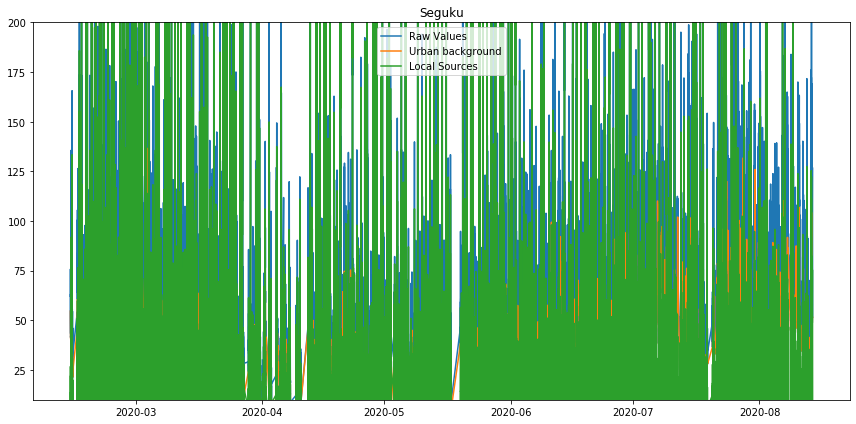

Location  8 done!


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


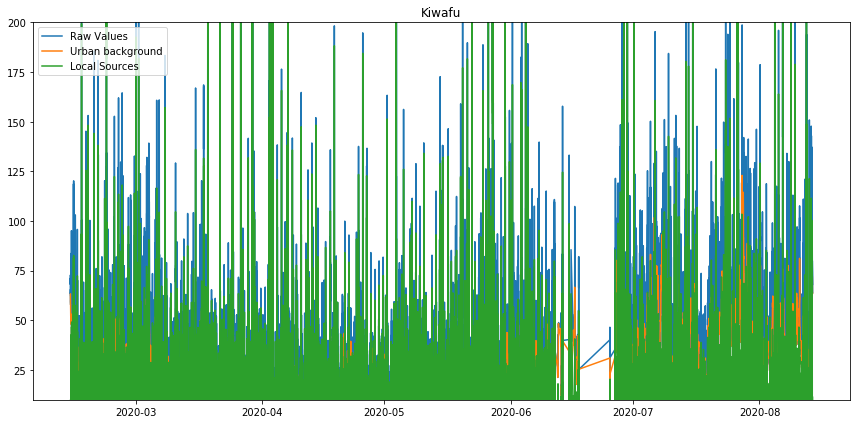

Location  9 done!


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


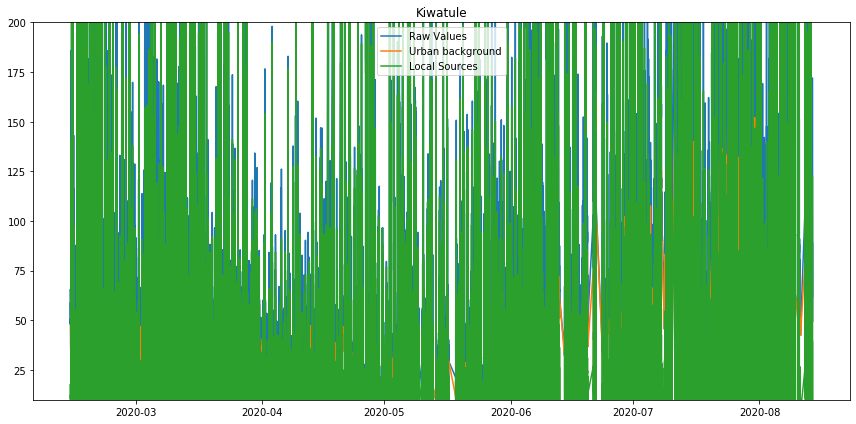

Location  10 done!


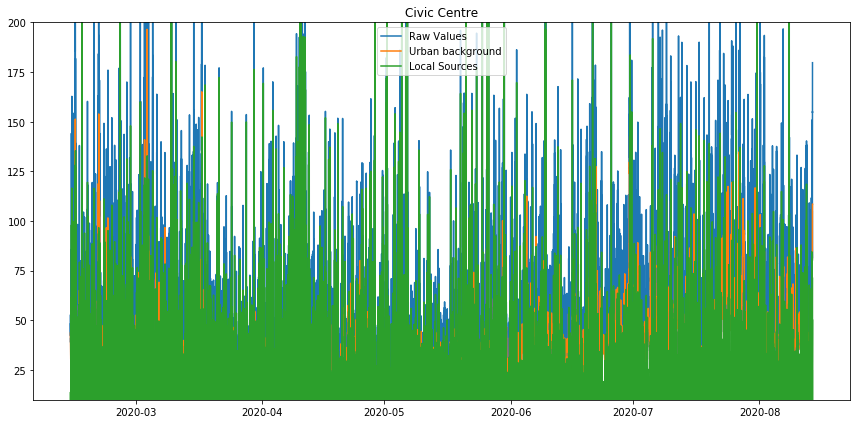

Location  11 done!


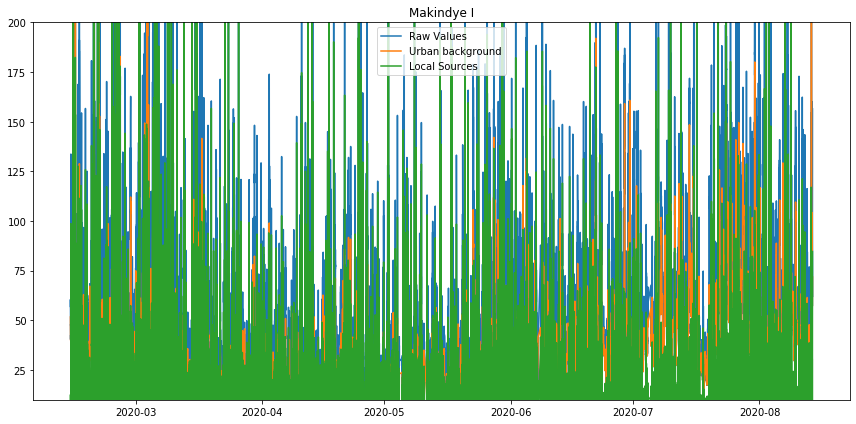

Location  12 done!


In [43]:
for index, location in enumerate(channel_array):
    df = pd.read_csv('./data/'+location['name']+'-'+location['location']+'.csv', parse_dates =['created_at'])
    df = preprocessing(df, 'pm2_5')
    df['urban_background'] = df['created_at'].swifter.apply(get_minimum)
    df['local_sources'] = df['pm2_5']-df['urban_background']
    df.to_csv(r'background vs local/'+location['location']+'.csv', index=False)
    plotting(df, location['location'])
    print('Location ', index, 'done!')